In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn, optim
from torchvision import datasets, transforms, models
import os
import requests
from pathlib import Path
import tarfile
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from PIL import Image


In [2]:
# defining dataset directory
data_dir = './flowers'

# using pathlib.Path for handling PosixPath
FLOWERS_DIR = Path(data_dir)

# downloading and setting up data if not already present
if not FLOWERS_DIR.is_dir():

    FLOWERS_DIR.mkdir(parents=True, exist_ok=True)
    print(f"[INFO] Directory created: ./{FLOWERS_DIR}")

    print()

    # tarball path
    TARBALL = FLOWERS_DIR / "flower_data.tar.gz"

    # downloading and writing the tarball to './flowers' directory
    print(f"[INFO] Downloading the file 'flower_data.tar.gz' to ./{FLOWERS_DIR}")
    request = requests.get('https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz')
    with open(TARBALL, "wb") as file_ref:
        file_ref.write(request.content)
        print(f"[INFO] 'flower_data.tar.gz' saved to ./{FLOWERS_DIR}")

    print()

    # extracting the downloaded tarball
    print(f"[INFO] Extracting the downloaded tarball to ./{FLOWERS_DIR}")
    with tarfile.open(TARBALL, "r") as tar_ref:
        tar_ref.extractall(FLOWERS_DIR)
        print(f"[INFO] 'flower_data.tar.gz' extracted successfully to ./{FLOWERS_DIR}")

    print()

    # using os.remove to delete the downloaded tarball
    print("[INFO] Deleting the tarball to save space.")
    os.remove(TARBALL)
else:
    print(f"[INFO] Dataset already setup at ./{FLOWERS_DIR}")

[INFO] Directory created: ./flowers

[INFO] Downloading the file 'flower_data.tar.gz' to ./flowers
[INFO] 'flower_data.tar.gz' saved to ./flowers

[INFO] Extracting the downloaded tarball to ./flowers
[INFO] 'flower_data.tar.gz' extracted successfully to ./flowers

[INFO] Deleting the tarball to save space.


In [4]:
# Set the directories for the dataset
data_dir = 'flowers'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

#Transforms for the training, validation, and testing sets
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# TODO: Load the datasets with ImageFolder
image_datasets = {
    'train': datasets.ImageFolder(train_dir, transform=data_transforms['train']),
    'valid': datasets.ImageFolder(valid_dir, transform=data_transforms['valid']),
    'test': datasets.ImageFolder(test_dir, transform=data_transforms['test'])
}

# TODO: Using the image datasets and the trainforms, define the dataloaders
dataloaders =  {
    'train': DataLoader(image_datasets['train'], batch_size=32, shuffle=True),
    'valid': DataLoader(image_datasets['valid'], batch_size=32),
    'test': DataLoader(image_datasets['test'], batch_size=32)
}


In [5]:
import json

data = {
    "21": "fire lily", "3": "canterbury bells", "45": "bolero deep blue", "1": "pink primrose", "34": "mexican aster",
    "27": "prince of wales feathers", "7": "moon orchid", "16": "globe-flower", "25": "grape hyacinth", "26": "corn poppy",
    "79": "toad lily", "39": "siam tulip", "24": "red ginger", "67": "spring crocus", "35": "alpine sea holly",
    "32": "garden phlox", "10": "globe thistle", "6": "tiger lily", "93": "ball moss", "33": "love in the mist",
    "9": "monkshood", "102": "blackberry lily", "14": "spear thistle", "19": "balloon flower", "100": "blanket flower",
    "13": "king protea", "49": "oxeye daisy", "15": "yellow iris", "61": "cautleya spicata", "31": "carnation",
    "64": "silverbush", "68": "bearded iris", "63": "black-eyed susan", "69": "windflower", "62": "japanese anemone",
    "20": "giant white arum lily", "38": "great masterwort", "4": "sweet pea", "86": "tree mallow",
    "101": "trumpet creeper", "42": "daffodil", "22": "pincushion flower", "2": "hard-leaved pocket orchid",
    "54": "sunflower", "66": "osteospermum", "70": "tree poppy", "85": "desert-rose", "99": "bromelia", "87": "magnolia",
    "5": "english marigold", "92": "bee balm", "28": "stemless gentian", "97": "mallow", "57": "gaura",
    "40": "lenten rose", "47": "marigold", "59": "orange dahlia", "48": "buttercup", "55": "pelargonium",
    "36": "ruby-lipped cattleya", "91": "hippeastrum", "29": "artichoke", "71": "gazania", "90": "canna lily",
    "18": "peruvian lily", "98": "mexican petunia", "8": "bird of paradise", "30": "sweet william",
    "17": "purple coneflower", "52": "wild pansy", "84": "columbine", "12": "colt's foot", "11": "snapdragon",
    "96": "camellia", "23": "fritillary", "50": "common dandelion", "44": "poinsettia", "53": "primula",
    "72": "azalea", "65": "californian poppy", "80": "anthurium", "76": "morning glory", "37": "cape flower",
    "56": "bishop of llandaff", "60": "pink-yellow dahlia", "82": "clematis", "58": "geranium", "75": "thorn apple",
    "41": "barbeton daisy", "95": "bougainvillea", "43": "sword lily", "83": "hibiscus", "78": "lotus lotus",
    "88": "cyclamen", "94": "foxglove", "81": "frangipani", "74": "rose", "89": "watercress", "73": "water lily",
    "46": "wallflower", "77": "passion flower", "51": "petunia"
}

with open('cat_to_name.json', 'w') as file:
    json.dump(data, file)

In [8]:

model = models.vgg16(pretrained=True)


for param in model.parameters():
    param.requires_grad = False


classifier = nn.Sequential(
    nn.Linear(25088, 4096),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(4096, 1024),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(1024, 102),
    nn.LogSoftmax(dim=1)
)


model.classifier = classifier

# Set up the device and move the model to it as I was getting some errors.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Set up loss function and optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

# Training the model
epochs = 5
steps = 0
print_every = 40

for epoch in range(epochs):
    running_loss = 0
    model.train()  # Put the model in training mode
    for images, labels in dataloaders['train']:
        steps += 1

        images, labels = images.to(device), labels.to(device)


        optimizer.zero_grad()

        # Forward pass
        logps = model(images)
        loss = criterion(logps, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        running_loss += loss.item()


        if steps % print_every == 0:
            model.eval()
            validation_loss = 0
            accuracy = 0
            with torch.no_grad():
                for images, labels in dataloaders['valid']:
                    images, labels = images.to(device), labels.to(device)
                    logps = model(images)
                    batch_loss = criterion(logps, labels)
                    validation_loss += batch_loss.item()

                    # Calculating accuracy
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}.. "
                  f"Validation loss: {validation_loss/len(dataloaders['valid']):.3f}.. "
                  f"Validation accuracy: {accuracy/len(dataloaders['valid']):.3f}")

            running_loss = 0
            model.train()  # Setting the model back to training mode for the next epoch


Epoch 1/5.. Train loss: 4.839.. Validation loss: 3.603.. Validation accuracy: 0.213
Epoch 1/5.. Train loss: 3.196.. Validation loss: 2.337.. Validation accuracy: 0.389
Epoch 1/5.. Train loss: 2.270.. Validation loss: 1.640.. Validation accuracy: 0.561
Epoch 1/5.. Train loss: 1.987.. Validation loss: 1.308.. Validation accuracy: 0.646
Epoch 1/5.. Train loss: 1.825.. Validation loss: 1.065.. Validation accuracy: 0.710
Epoch 2/5.. Train loss: 1.360.. Validation loss: 1.107.. Validation accuracy: 0.692
Epoch 2/5.. Train loss: 1.428.. Validation loss: 0.933.. Validation accuracy: 0.742
Epoch 2/5.. Train loss: 1.350.. Validation loss: 0.764.. Validation accuracy: 0.782
Epoch 2/5.. Train loss: 1.421.. Validation loss: 0.823.. Validation accuracy: 0.761
Epoch 2/5.. Train loss: 1.325.. Validation loss: 0.874.. Validation accuracy: 0.765
Epoch 3/5.. Train loss: 0.940.. Validation loss: 0.699.. Validation accuracy: 0.805
Epoch 3/5.. Train loss: 1.263.. Validation loss: 0.730.. Validation accuracy

In [9]:
# Put the model in evaluation mode
model.eval()


test_loss = 0
accuracy = 0


with torch.no_grad():
    for images, labels in dataloaders['test']:
        images, labels = images.to(device), labels.to(device)

        logps = model(images)
        batch_loss = criterion(logps, labels)
        test_loss += batch_loss.item()


        ps = torch.exp(logps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

# Printing test loss and accuracy
print(f"Test Loss: {test_loss/len(dataloaders['test']):.3f}")
print(f"Test Accuracy: {accuracy/len(dataloaders['test']):.3f}")


Test Loss: 0.545
Test Accuracy: 0.838


In [10]:
model.class_to_idx = image_datasets['train'].class_to_idx

# Defining the checkpoint dictionary
checkpoint = {
    'model_state_dict': model.state_dict(),
    'class_to_idx': model.class_to_idx,
    'optimizer_state_dict': optimizer.state_dict(),
    'epochs': epochs,
    'classifier': model.classifier
}

# Save the checkpoint( I think its not too large)))
torch.save(checkpoint, 'checkpoint.pth')


In [11]:
def load_checkpoint(filepath):

    checkpoint = torch.load(filepath)


    model = models.vgg16(pretrained=True)

    # Freeze parameters so we don't backprop through them
    for param in model.parameters():
        param.requires_grad = False


    model.classifier = checkpoint['classifier']
    model.load_state_dict(checkpoint['model_state_dict'])
    model.class_to_idx = checkpoint['class_to_idx']
    optimizer = torch.optim.Adam(model.classifier.parameters(), lr=0.001)
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epochs = checkpoint.get('epochs', 0)

    return model, optimizer, epochs


model, optimizer, epochs = load_checkpoint('checkpoint.pth')


<ipython-input-11-8524834663d1>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(filepath)


In [12]:
def process_image(image_path):


    pil_image = Image.open(image_path)

    #Resizing
    if pil_image.width < pil_image.height:
        pil_image = pil_image.resize((256, int(256 * pil_image.height / pil_image.width)))
    else:
        pil_image = pil_image.resize((int(256 * pil_image.width / pil_image.height), 256))


    left = (pil_image.width - 224) / 2
    top = (pil_image.height - 224) / 2
    right = left + 224
    bottom = top + 224
    pil_image = pil_image.crop((left, top, right, bottom))

    # Converting image to numpy array and scale pixel values between 0 and 1
    np_image = np.array(pil_image) / 255.0

    # Normalize each color channel
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    np_image = (np_image - mean) / std

    # Reorder color channel
    np_image = np_image.transpose((2, 0, 1))

    return np_image


In [13]:
def imshow(image, ax=None, title=None):

    if ax is None:
        fig, ax = plt.subplots()


    image = image.numpy() if isinstance(image, torch.Tensor) else image
    image = image.transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean

    # Clipping the image to be between 0 and 1
    image = np.clip(image, 0, 1)

    ax.imshow(image)

    return ax


In [14]:
def predict(image_path, model, topk=5):



    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    image = process_image(image_path)
    image_tensor = torch.from_numpy(image).unsqueeze(0).float().to(device)

    # Move the model to the same device as the image tensor as I was getting some errors by not doing this
    model = model.to(device)

    model.eval()


    with torch.no_grad():
        output = model(image_tensor)

    # Apply softmax to get probabilities
    probs = torch.softmax(output, dim=1)

    # Get the top K most probable classes
    top_probs, indices = probs.topk(topk, dim=1)

    # Move the top_probs back to CPU to avoid any further device errors
    top_probs = top_probs.cpu().numpy()[0]
    indices = indices.cpu().numpy()[0]

    # Mapping indices to classes
    idx_to_class = {val: key for key, val in model.class_to_idx.items()}
    classes = [idx_to_class[idx] for idx in indices]

    return top_probs, classes


In [15]:
image_path = 'flowers/test/1/image_06760.jpg'  #Testing for my given image from flowers folder
probs, classes = predict(image_path, model)
print("Probabilities:", probs)
print("Classes:", classes)


Probabilities: [0.42148945 0.08798444 0.07371697 0.04743577 0.04186084]
Classes: ['51', '52', '96', '55', '40']


In [16]:
#Earlier I forgot to open it in read mode so doing it here with name "cat_to_name"
with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

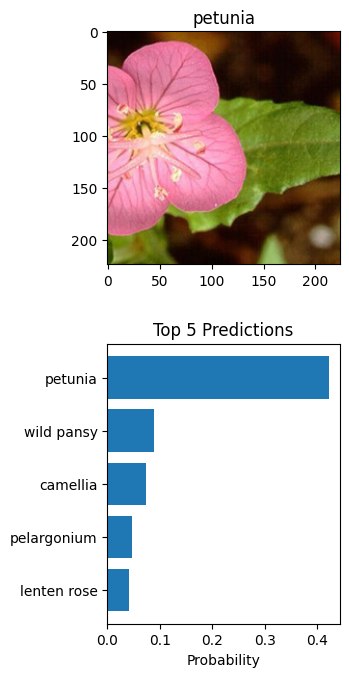

In [17]:
def display_prediction(image_path, model, cat_to_name, topk=5):

    probs, classes = predict(image_path, model, topk)

    # Convert class indices to names
    flower_names = [cat_to_name[str(class_idx)] for class_idx in classes]

    # Displaying the image
    plt.figure(figsize=(3, 8))
    ax = plt.subplot(2, 1, 1)

    image = process_image(image_path)
    imshow(torch.from_numpy(image), ax=ax)
    ax.set_title(flower_names[0])  #Title of flower is set

    # Plotting probabilities
    plt.subplot(2, 1, 2)
    plt.barh(flower_names, probs)
    plt.gca().invert_yaxis()
    plt.xlabel('Probability')
    plt.title('Top 5 Predictions')

    plt.show()

# My Example Usage
image_path = 'flowers/test/1/image_06760.jpg'  # Replace with your image path
display_prediction(image_path, model, cat_to_name)